# USE CASE: CNN, CLASSIFICATION OF DOGS AND CATS

We have been given a use case on the classification of images as dogs or cats using convolution neural networks. We create training and test directories with 2000 and 1000 images respectively form the given dataset. We use the keras module. We start by using 32 2D filters in the convolution layer and changing the input dimensions of images to 150x150x3. We add a pooling layer with filter size of 2x2. We flatten the matrices obtained and add dense layers with 128 and 1 output dimensions respectively. Since this is a classification problem, we finish by having a dense layer with output dimension as 1 and activation function as sigmoid function. We use the 'adam' solver and binary_cross_entorpy for modelling loss. We get a training accuracy of 76% and a test accuracy of 71 %. We plot training loss and accuracy with the number of epochs.

In [1]:
import os
orgpath = os.getcwd()
orgpath

'/home/an09893140'

In [2]:
os.chdir('/home/dataset/training_set/')

In [3]:
ls

cats/  dogs/


In [4]:
os.chdir('/home/dataset/test_set/')

In [5]:
ls

cats/  dogs/


In [6]:
os.chdir('/home/dataset/training_set/cats/')

In [7]:
ls

cat.1000.jpg  cat.1721.jpg  cat.2441.jpg  cat.3161.jpg  cat.3882.jpg
cat.1001.jpg  cat.1722.jpg  cat.2442.jpg  cat.3162.jpg  cat.3883.jpg
cat.1002.jpg  cat.1723.jpg  cat.2443.jpg  cat.3163.jpg  cat.3884.jpg
cat.1003.jpg  cat.1724.jpg  cat.2444.jpg  cat.3164.jpg  cat.3885.jpg
cat.1004.jpg  cat.1725.jpg  cat.2445.jpg  cat.3165.jpg  cat.3886.jpg
cat.1005.jpg  cat.1726.jpg  cat.2446.jpg  cat.3166.jpg  cat.3887.jpg
cat.1006.jpg  cat.1727.jpg  cat.2447.jpg  cat.3167.jpg  cat.3888.jpg
cat.1007.jpg  cat.1728.jpg  cat.2448.jpg  cat.3168.jpg  cat.3889.jpg
cat.1008.jpg  cat.1729.jpg  cat.2449.jpg  cat.3169.jpg  cat.388.jpg
cat.1009.jpg  cat.172.jpg   cat.244.jpg   cat.316.jpg   cat.3890.jpg
cat.100.jpg   cat.1730.jpg  cat.2450.jpg  cat.3170.jpg  cat.3891.jpg
cat.1010.jpg  cat.1731.jpg  cat.2451.jpg  cat.3171.jpg  cat.3892.jpg
cat.1011.jpg  cat.1732.jpg  cat.2452.jpg  cat.3172.jpg  cat.3893.jpg
cat.1012.jpg  cat.1733.jpg  cat.2453.jpg  cat.3173.jpg  cat.3894.jpg
cat.1013.jpg  cat.1734.jpg  cat.245

In [8]:
os.chdir('/home/dataset/training_set/dogs/')

In [9]:
ls

dog.1000.jpg  dog.1722.jpg  dog.2442.jpg  dog.3162.jpg  dog.3884.jpg
dog.1001.jpg  dog.1723.jpg  dog.2443.jpg  dog.3163.jpg  dog.3885.jpg
dog.1002.jpg  dog.1724.jpg  dog.2444.jpg  dog.3164.jpg  dog.3886.jpg
dog.1003.jpg  dog.1725.jpg  dog.2445.jpg  dog.3165.jpg  dog.3887.jpg
dog.1004.jpg  dog.1726.jpg  dog.2446.jpg  dog.3166.jpg  dog.3888.jpg
dog.1005.jpg  dog.1727.jpg  dog.2447.jpg  dog.3167.jpg  dog.3889.jpg
dog.1006.jpg  dog.1728.jpg  dog.2448.jpg  dog.3168.jpg  dog.388.jpg
dog.1007.jpg  dog.1729.jpg  dog.2449.jpg  dog.3169.jpg  dog.3890.jpg
dog.1008.jpg  dog.172.jpg   dog.244.jpg   dog.316.jpg   dog.3891.jpg
dog.1009.jpg  dog.1730.jpg  dog.2450.jpg  dog.3170.jpg  dog.3892.jpg
dog.100.jpg   dog.1731.jpg  dog.2451.jpg  dog.3171.jpg  dog.3893.jpg
dog.1010.jpg  dog.1732.jpg  dog.2452.jpg  dog.3172.jpg  dog.3894.jpg
dog.1011.jpg  dog.1733.jpg  dog.2453.jpg  dog.3173.jpg  dog.3895.jpg
dog.1012.jpg  dog.1734.jpg  dog.2454.jpg  dog.3174.jpg  dog.3896.jpg
dog.1013.jpg  dog.1735.jpg  dog.245

In [10]:
import glob
import os, sys
import random
from tqdm import tqdm

import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

/opt/usr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[]

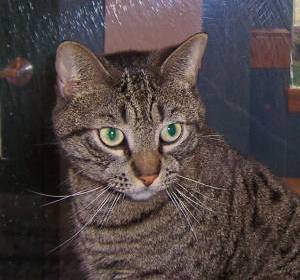

In [11]:
from IPython.display import Image, display
display(Image('/home/dataset/training_set/cats/cat.1.jpg'))

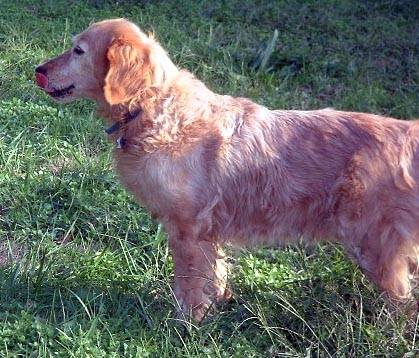

In [12]:
display(Image('/home/dataset/training_set/dogs/dog.3881.jpg'))

In [13]:
# Path to original directories

In [14]:
original_dataset_dir1 = '/home/dataset/training_set/cats'
original_dataset_dir2 = '/home/dataset/test_set/cats'
original_dataset_dir3 = '/home/dataset/training_set/dogs'
original_dataset_dir4 = '/home/dataset/test_set/dogs'

In [15]:
# directory for storing smaller dataset

In [16]:
base_dir = '/home/an09893140/cats_and_dogs'

In [17]:
# Directories for train and test data. Directories for train and test cats and dogs.

In [18]:
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test') 
os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats') 
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs') 
os.mkdir(train_dogs_dir)

In [19]:
test_cats_dir = os.path.join(test_dir, 'cats') 
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs') 
os.mkdir(test_dogs_dir)

In [20]:
# Copies the first 1000 images to train_cats_dir

In [21]:
import shutil
fnames = ['cat.{}.jpg'.format(i) for i in range(1,1000)] 
for fname in fnames: 
    src = os.path.join(original_dataset_dir1, fname) 
    dst = os.path.join(train_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [22]:
# copies the next 500 images to test_cats_dir

In [23]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)] 
for fname in fnames: 
    src = os.path.join(original_dataset_dir1, fname) 
    dst = os.path.join(test_cats_dir, fname) 
    shutil.copyfile(src, dst)

In [24]:
# Copies the first 1000 images to train_dogs_dir

In [25]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1,1000)] 
for fname in fnames: 
    src = os.path.join(original_dataset_dir3, fname) 
    dst = os.path.join(train_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [26]:
# copies the next 500 images to test_dogs_dir

In [27]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)] 
for fname in fnames: 
    src = os.path.join(original_dataset_dir3, fname) 
    dst = os.path.join(test_dogs_dir, fname) 
    shutil.copyfile(src, dst)

In [28]:
#Part1 - Importing Keras library
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [29]:
#Initialising the CNN 
classifier=Sequential()

# Step 1 convolution 

classifier.add(Convolution2D(32,(3,3),input_shape=(150,150,3),activation='relu'))

#Step 2 - Pooling 

classifier.add(MaxPooling2D(pool_size=(2,2)))

#Step 3- Flattening
classifier.add(Flatten())
# Step 4- Full connection
classifier.add(Dense(output_dim=128,activation='relu'))
classifier.add(Dense(output_dim=1,activation='sigmoid'))

# compiling The CNN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  from ipykernel import kernelapp as app
/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  app.launch_new_instance()


In [30]:
# Rescale all images by 1/255, Resize all images to 150x150

In [31]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
# Fitting the model

In [33]:
history = classifier.fit_generator( training_set, steps_per_epoch=100, epochs=10, validation_data= None, validation_steps=50)

Epoch 1/10
100/100 [==============================] - 38s 376ms/step - loss: 7.8481 - acc: 0.5033
Epoch 2/10
100/100 [==============================] - 37s 373ms/step - loss: 8.1044 - acc: 0.4972
Epoch 3/10
100/100 [==============================] - 37s 369ms/step - loss: 8.0311 - acc: 0.5017
Epoch 4/10
100/100 [==============================] - 38s 376ms/step - loss: 7.6288 - acc: 0.4998
Epoch 5/10
100/100 [==============================] - 38s 384ms/step - loss: 0.6899 - acc: 0.5617
Epoch 6/10
100/100 [==============================] - 37s 365ms/step - loss: 0.6357 - acc: 0.6331
Epoch 7/10
100/100 [==============================] - 37s 370ms/step - loss: 0.5966 - acc: 0.6912
Epoch 8/10
100/100 [==============================] - 37s 365ms/step - loss: 0.5405 - acc: 0.7340
Epoch 9/10
100/100 [==============================] - 37s 370ms/step - loss: 0.5204 - acc: 0.7470
Epoch 10/10
100/100 [==============================] - 38s 383ms/step - loss: 0.4823 - acc: 0.7595


In [35]:
# Displaying curves of loss and accuracy during training

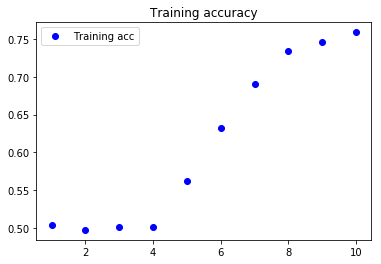

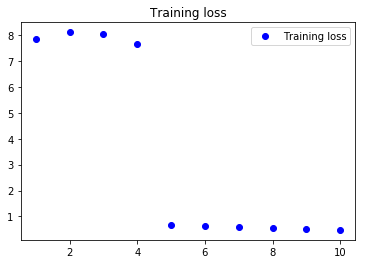

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc'] 
loss = history.history['loss'] 
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.title('Training loss') 
plt.legend()
plt.show()

In [41]:
classifier.evaluate_generator(test_set, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

[0.6190369515419006, 0.711]

In [42]:
# Loss , Accuracy above (in that order)